 ## Bayesianism

- quantify the probability of all possibilities, and therefore measure risk
- insert institutional knowledge
- learn in an online fashion

#### Approximate Bayesian Computation. Here's the entire algorithm:

- generate a trial value for the thing we want to know (in this case it's the conversion fraction of a layout)
- simulate our data assuming the trial value
- if the simulation looks like the real data, keep the trial value, otherwise discard it and try again
- keep doing this until we've got lots of trial values that worked

In [42]:
import random

def trial_conversion_a():
    '''Return a random number in interval (0, 1).'''
    return random.random()

trial_conversion_a()

0.4700196426436586

In [43]:
def simulate_conversion(p, n_visitors):
    '''Returns number of vistors who convert given conversion fraction p.'''
    outcomes = [random.random() < p  for _ in range(n_visitors)]
    return sum(outcomes)

simulate_conversion(0.5, 10)

4

In [44]:
def estimate_conversion(n_visitors, n_conv, trial_conversion, n_estimates=5000):
    '''
    Return n_estimates estimates of the conversion fraction of a layout that 
    received n_visitors, n_conv of which converted.
    '''
    i = 0
    estimates = []
    while i < n_estimates:
        p = trial_conversion()
        n_sim = simulate_conversion(p, n_visitors)
        if n_conv == n_sim:
            estimates.append(p)
            i += 1
    return estimates

In [45]:
n_visitors_a = 100  # number of visitors shown layout A
n_conv_a = 4        # number of vistors shown layout A who converted (4%)

n_visitors_b = 40  
n_conv_b = 2

a_estimates = estimate_conversion(n_visitors_a, n_conv_a, trial_conversion_a)
len(a_estimates)

5000

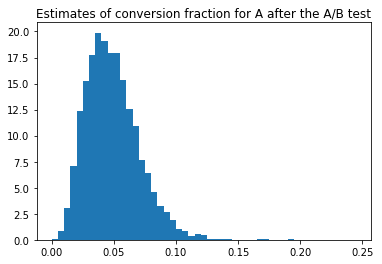

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
abbins = [i/200.0 for i in range(50)]  # 50 bins between 0 and 0.25

plt.hist(a_estimates, bins=abbins, normed=True)
plt.title('Estimates of conversion fraction for A after the A/B test');

In [97]:
def trial_conversion_b():
    '''Return a random number around 0.06+/-0.02.'''
    while True:
        x = random.normalvariate(mu=0.06, sigma=0.02)
        if 0 <= x <= 1:
            return x

trial_conversion_b()

0.06549833933390767

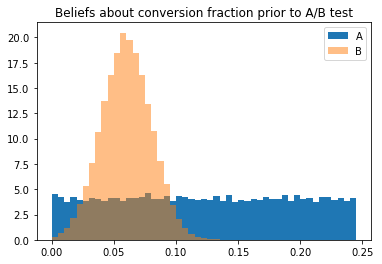

In [98]:
trial_as = [trial_conversion_a() for _ in range(100000)]
trial_bs = [trial_conversion_b() for _ in range(100000)]

plt.hist(trial_as, bins=abbins, label='A', normed=True)
plt.hist(trial_bs, bins=abbins, label='B', alpha=0.5, normed=True)
plt.title('Beliefs about conversion fraction prior to A/B test')
plt.legend();

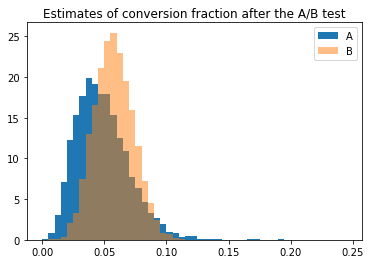

In [103]:
b_estimates = estimate_conversion(n_visitors_b, n_conv_b, trial_conversion_b)
plt.hist(a_estimates, bins=abbins, label='A', normed=True)
plt.hist(b_estimates, bins=abbins, label='B', alpha=0.5, normed=True)
plt.title('Estimates of conversion fraction after the A/B test')
plt.legend();

### THE ANSWER TO THE A/B TEST


In [104]:
b_better = [b > a for a, b in zip(a_estimates, b_estimates)]
#print(b_better[:10])
print("\n\nOur confidence that B is better than A = {} \n"\
      .format(sum(b_better)/len(b_better)))



Our confidence that B is better than A = 0.655 



>If layout B would cost us $1m, perhaps this is not confident enough to risk the change. In that case, we'd run the A/B test for longer, and hopefully become more confident.



>You can use a_estimates and b_estimates to answer some arbitrary questions. Go back and change the code in the last couple of cells and figure out the probability that the conversion fraction of layout A is greater than 6%?

In [105]:
#  The probability that the conversion fraction 
#   of layout A is greater than 6%?
sum([i>0.06 for i in a_estimates])/len(a_estimates)

0.2674

> Here's another question. Let's say we'll only bother to switch to layout B if it's at least 1% better than layout A. What's the probability this is true?



In [106]:

switch_b= [(b-a)/a >=.01 for a, b in zip(a_estimates, b_estimates)]
sum(switch_b)/len(a_estimates)

0.6492

> Now, about those prior beliefs. The middle of the distribution of b_estimates is actually a little closer to 0.06, the value favored by the prior than to 0.05, the value favored by the data.

>>First, measure exactly how much closer by determining the mean of that list.

>>>See if you can figure out why it's closer to the value favored by the prior than that favored by the data? Here's a clue: what happens if you increase the number of visitors who see layout B by a factor of say 10 (and the number who convert by the same factor)?

In [112]:
n_visitors_b = 40*10
n_conv_b = 2*10
n_visitors_b, n_conv_b= n_visitors_b*1, n_conv_b*1
b_estimates = estimate_conversion(n_visitors_b, n_conv_b, trial_conversion_b)

import numpy as np
np.mean(b_estimates)

0.053647647158831115